In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 회귀분석
from statsmodels.formula.api import ols
# 회귀분석 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 
import statsmodels.formula.api as smf
# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# data split
from sklearn.model_selection import train_test_split
# 선형 회귀 모형
from sklearn.linear_model import LinearRegression
# 규제화 패키지
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 변수 선택법
from sklearn.feature_selection import RFE
# Scale 변환
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 설정
# !ls -l /usr/share/fonts/truetype/
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: c

fc-cache: succeeded


['NanumGothic Eco',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'Nanum Brush Script',
 'NanumMyeongjo Eco',
 'NanumMyeongjo Eco',
 'NanumBarunGothic',
 'NanumBarunpen',
 'NanumBarunpen',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumSquare',
 'NanumSquareRound',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumMyeongjo Eco',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'Nanum Pen Script',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumMyeongjo Eco',
 'NanumGothicCoding',
 'NanumBarunpen',
 'NanumBarunpen',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumMyeongjo Eco',
 'NanumGothic Eco',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'Nanum Pen Script',
 'NanumSquareRound',
 'NanumGothicCoding',
 'NanumBar

In [35]:
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 전체 적용
plt.rcParams["font.family"] = 'NanumMyeongjo'

# 실습과제 1

## 데이터 불러오기

In [48]:
df = pd.read_csv('/home/piai/Bigdata 실습과제/2. Big Data 분석/DIABETES.csv', encoding = 'utf-8')
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


## 변수 간의 경향성 파악

### 산점도 분석

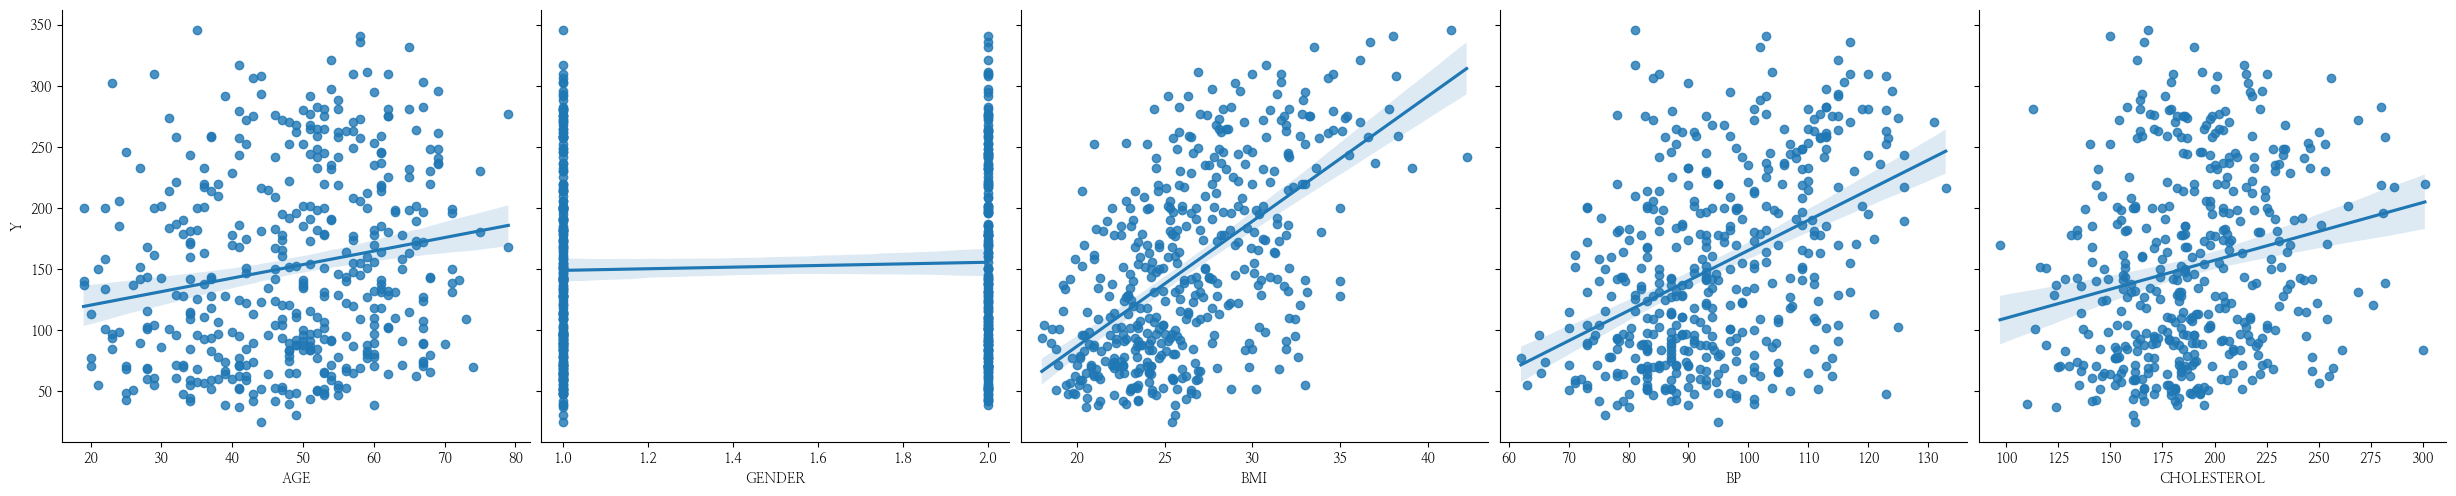

In [42]:
sns.pairplot(df, y_vars = 'Y', x_vars=['AGE', 'GENDER', 'BMI', 'BP', 'CHOLESTEROL'], kind='reg', height = 5)

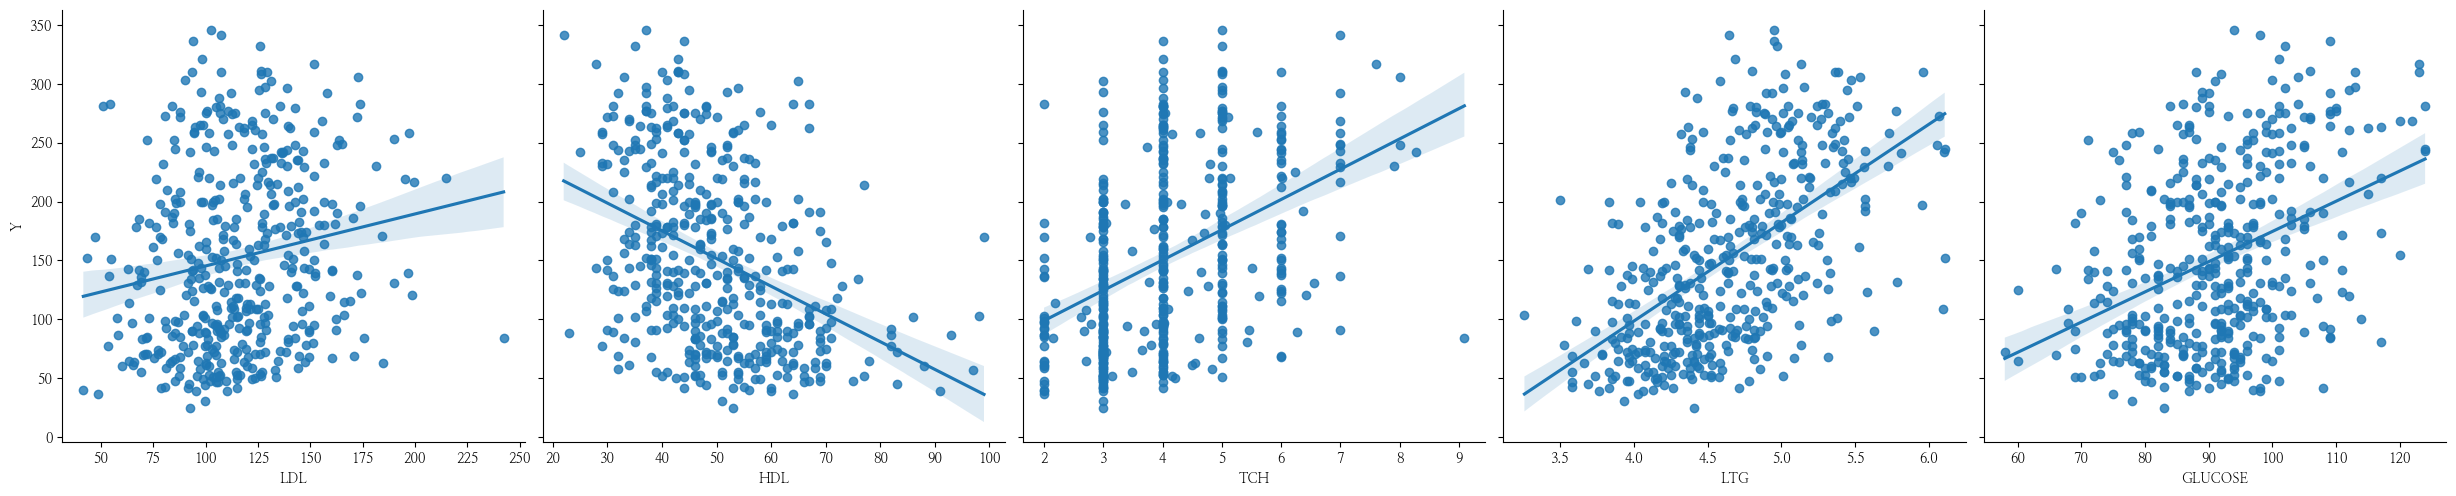

In [43]:
sns.pairplot(df, y_vars = 'Y', x_vars=['LDL', 'HDL', 'TCH', 'LTG', 'GLUCOSE'], kind='reg', height = 5)

* 목표변수와 선형의 관계가 있는 것으로 추정되는 설명변수 : BMI, HDL, LTG, GLUCOSE
* 목표변수와 선형의 관계가 있는 지 판단하기 어려운 설명변수 : AGE, BP, CHOLESTEROL, LDL
* 목표변수와 선형의 관계가 없는 것으로 판단되는 설명변수 : GENDER     

### 상관분석

In [49]:
df.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


* 목표변수와 높은 선형관계를 가지는 설명변수 확인 : BMI, BP, CHOLESTEROL, HDL, TCH, LTG, GLUCOSE
* 서로 다른 설명변수 간 높은 선형관계 확인 :  
    - TCH & LTG & LDL & CHOLESTEROL

## 회귀 모델 생성

In [28]:
# data split
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 1234)

# 선형 회귀 분석
reg_model = smf.ols(formula = "Y ~ AGE + GENDER + BMI + BP + CHOLESTEROL + LDL + HDL + TCH + LTG + GLUCOSE", data = df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     33.24
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           5.68e-43
Time:                        16:32:14   Log-Likelihood:                -1668.9
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     298   BIC:                             3401.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -334.9870     86.627     -3.867      

* p-value : 5.68e-43 이므로 회귀모델로서 유의
* 설명력 : 52.7%
* HDL, AGE는 p-value가 가장 높아 제거가 필요

### 다중공정성 검토

In [52]:
# 다중공정성 확인
df_train_x = df_train.drop('Y', axis = 1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
1,AGE,1.22
2,GENDER,1.23
4,BP,1.46
3,BMI,1.49
10,GLUCOSE,1.52
8,TCH,8.76
9,LTG,10.49
7,HDL,16.56
6,LDL,38.83
5,CHOLESTEROL,60.66


* CHOLESTEROL의 다중공정성이 제일 높아 제거가 필요

In [57]:
# VIF가 높은 변수 제거 
reg_model = smf.ols(formula = "Y ~ AGE + GENDER + BMI + BP + LDL + HDL + TCH + LTG + GLUCOSE", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     36.64
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.18e-43
Time:                        16:46:14   Log-Likelihood:                -1669.8
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     299   BIC:                             3397.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -237.2111     46.686     -5.081      0.0

In [59]:
# 다중공정성 재확인
df_train_x = df_train.drop(['Y','CHOLESTEROL'],axis = 1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
1,AGE,1.22
2,GENDER,1.23
4,BP,1.45
3,BMI,1.49
9,GLUCOSE,1.52
8,LTG,2.16
5,LDL,2.70
6,HDL,3.57
7,TCH,7.55
0,const,225.32


In [71]:
# 유의한 설명 변수 확인
reg_model = smf.ols(formula = " Y ~ GENDER + BP + BMI + LTG + HDL",data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     65.54
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           3.13e-46
Time:                        16:52:32   Log-Likelihood:                -1671.4
No. Observations:                 309   AIC:                             3355.
Df Residuals:                     303   BIC:                             3377.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -222.3503     43.720     -5.086      0.0

In [89]:
# 다중공산성 재확인
df_train_x = df_train[['GENDER','BP', 'BMI', 'LTG', 'HDL']]
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
1,GENDER,1.19
2,BP,1.31
5,HDL,1.42
3,BMI,1.43
4,LTG,1.45
0,const,198.22


* 유의하다고 판단되는 설명변수 : GENDER, BP, HDL, BMI, LTG

## 오차의 기본가정 검토

### 등분산성 검정

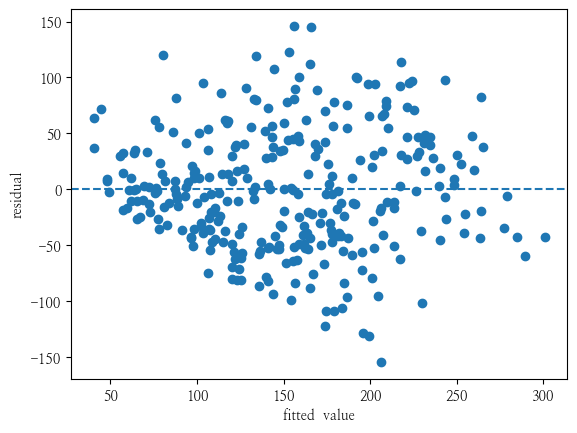

In [80]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted  value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = '--')

### 정규성 검정

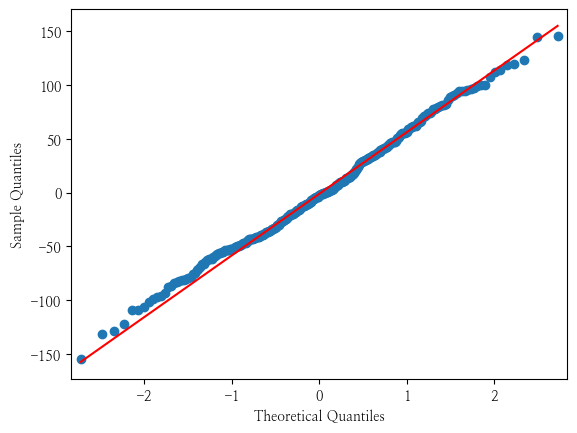

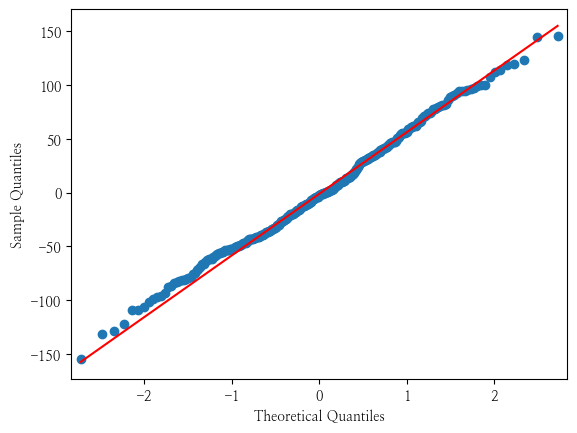

In [82]:
qqplot(reg_result.resid, line = "q")

### 독립성 검정

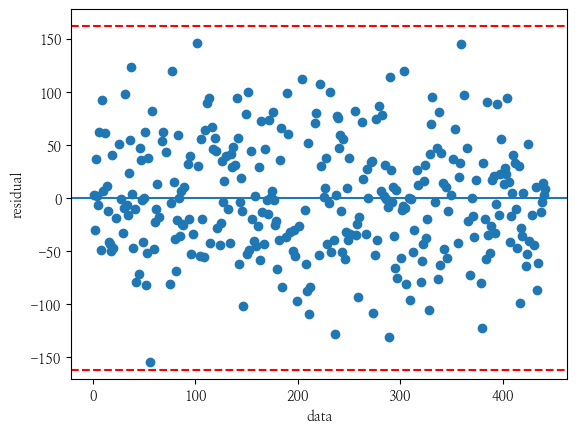

In [83]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("data")
plt.ylabel('residual')
plt.axhline(y=0, linestyle='-', label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle='--', color = 'red', label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid),linestyle='--', color = 'red', label='LCL')

## 후진제거법을 이용한 경우

In [95]:
# 목표변수 설명변수 분리
df_train_y = df_train['Y']
df_train_y = df_train.drop('Y', axis = 1)

# 선형회귀 모델
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)

# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables: {0}".format(selected_cols))
print("Removed Variables: {0}".format(removed_cols))

Selected Variables: Index(['GENDER', 'BP', 'BMI', 'LTG', 'HDL'], dtype='object')
Removed Variables: Index([], dtype='object')


<AxesSubplot:>

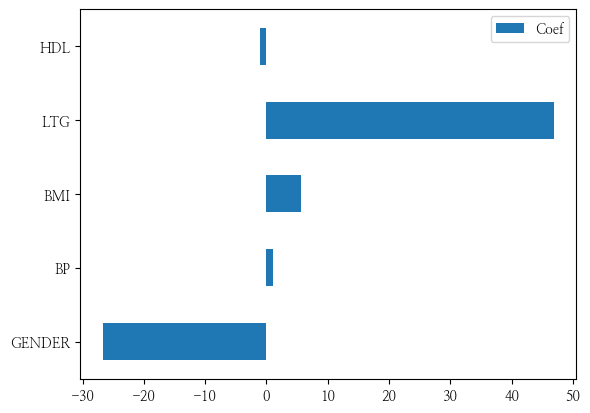

In [96]:
# 결론 도출
# 변수 중요도 확인
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]}, index = ['GENDER', 'BP', 'BMI', 'LTG', 'HDL'])
df_reg_coef.plot.barh(y = "Coef")

## 결론 도출

### 최종회귀식

In [94]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수: ", r2_score(df_train['Y'], train_pred))
print("test data의 결정계수: ", r2_score(df_test['Y'], test_pred))

train data의 결정계수:  0.5195783587017573
test data의 결정계수:  0.47623148143121863


##### 직접 제거하거나 후진제거법을 사용하여 판단하여도 동일한 설명변수들이 유의하다고 도출되었다
* 직접 제거하면서 유의하다고 판단한 설명변수
> GENDER, BP, BMI, LTG, HDL
* 후진제거법을 사용하여 유의하다고 판단한 설명변수
> GENDER, BP, BMI, LTG, HDL

# 실습과제 2

In [100]:
df = pd.read_csv('/home/piai/Bigdata 실습과제/2. Big Data 분석/DIABETES.csv', encoding = 'utf-8')
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


### 규제화 회귀분석 parameter 선정

* 목표변수 : Y
* 설명변수 : AGE, GENDER, BMI, BP, CHOLESTEROL, LDL, HDL, TCH, LTG, GLUCOSE

In [104]:
# 목표변수, 설명변수 지정
df_y = df["Y"]
df_x = df.drop("Y", axis = 1, inplace = False)
# Data split
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)

### Ridge 

In [150]:
# 모델 생성
ridge = Ridge(random_state = 1234, alpha = 1) # alpha : 규제화 강도
ridge.fit(df_train_x, df_train_y)
# 절편값 확인
print(ridge.intercept_)
# 회귀계수 확인
df_ridge_coef = pd.DataFrame({"Coef":ridge.coef_}, index = df_train_x.columns)
df_ridge_coef

-306.7161295761696


,Coef
AGE,-0.087323
GENDER,-26.376339
BMI,5.732591
BP,1.096005
CHOLESTEROL,-0.710335
LDL,0.405217
HDL,-0.032363
TCH,5.870169
LTG,60.932680
GLUCOSE,0.324675


<AxesSubplot:>

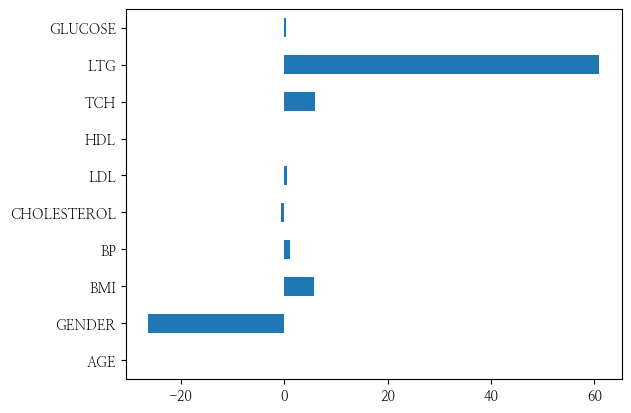

In [151]:
# 회귀계수 그래프
df_ridge_coef.plot.barh(y = 'Coef', legend = False)

In [152]:
# 모델의 성능(Ridge)
# alpha : 규제화 강도
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)

print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.5270323945692674
test data의 결정계수: 0.48910997165704284


### LASSO

In [137]:
# 모델 생성
lasso = Lasso(random_state = 1234, alpha = 1)
lasso.fit(df_train_x, df_train_y)
# 절편값 확인
print(lasso.intercept_)
# 회귀계수 확인
df_lasso_coef = pd.DataFrame({"Coef":lasso.coef_}, index = df_train_x.columns)
df_lasso_coef

-191.12806238247632


,Coef
AGE,-0.080238
GENDER,-21.835843
BMI,5.897974
BP,1.059783
CHOLESTEROL,0.361522
LDL,-0.500923
HDL,-1.387184
TCH,0.000000
LTG,32.395348
GLUCOSE,0.349297


<AxesSubplot:>

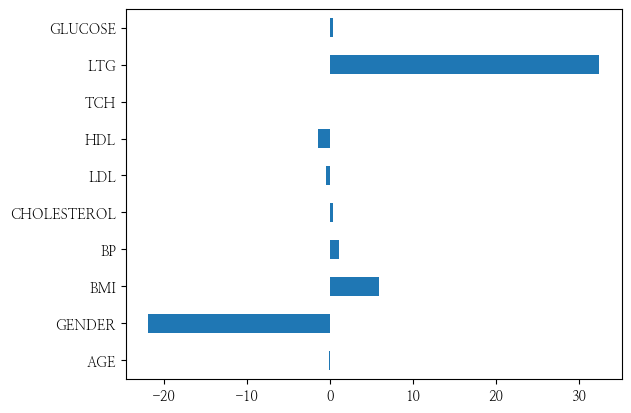

In [138]:
df_lasso_coef.plot.barh(y = 'Coef', legend = False)

In [140]:
# 모델의 성능
# alpha : 규제화 강도
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)

print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.5202442161926526
test data의 결정계수: 0.48454025777981535


## ElasticNet

In [134]:
# 모델 생성
elastic = ElasticNet(random_state = 1234, alpha = 1)
elastic.fit(df_train_x, df_train_y)
# 절편값 확인
print(elastic.intercept_)
# 회귀계수 확인
df_elastic_coef = pd.DataFrame({"Coef":elastic.coef_}, index = df_train_x.columns)
df_elastic_coef

-108.28267393864266


,Coef
AGE,-0.131786
GENDER,-7.153634
BMI,6.173054
BP,1.020044
CHOLESTEROL,1.344753
LDL,-1.447656
HDL,-2.208906
TCH,0.089822
LTG,2.696663
GLUCOSE,0.311498


<AxesSubplot:>

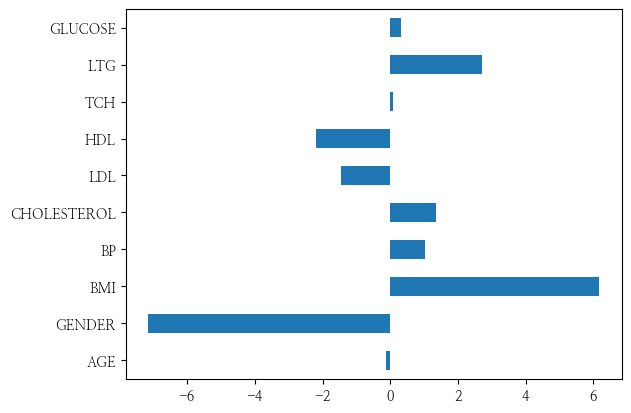

In [135]:
df_elastic_coef.plot.barh(y = 'Coef', legend = False)

In [153]:
# 모델의 성능
# alpha : 규제화 강도
train_pred = elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)

print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.49535107410484036
test data의 결정계수: 0.47170749686444946


## 결론

|규제화 종류|회귀계수|train data의 결정계수|test data의 결정계수|
|:------|:---|:---|:---|
|Ridge|-306.71|52.70|48.91|
|LASSO|-191.13|52.02|48.45|
|Elastic|-108.28|49.54|47.17|  

* 규제화 계수가 1일때 규제화 방법의 차이에 따른 회귀계수와 결정계수의 차이가 크지 않았다.  
* 규제화 방법 3가지 모두 LTG와 GENDER가 설명변수와 가장 큰 유의관계를 나타낸다고 판단하였다.